In [1]:
import pandas as pd
import sklearn as skl
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

# Make sure to add NUS_datathon_team_10_files to MyDrive as shortcut
merged_path = "/content/drive/MyDrive/NUS_datathon_team_10_files/merged_data_cleaned.csv"
df_merged = pd.read_csv(merged_path)

Mounted at /content/drive


In [2]:
!pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.0 MB/s 


In [3]:
pd.set_option('display.max_columns', None)
df_merged.head()

,subject_id,median_temp,temp_gap,hadm_id,stay_id,gender,dod,admittime,dischtime,los_hospital,admission_age,race,hospital_expire_flag,hospstay_seq,first_hosp_stay,icu_intime,icu_outtime,los_icu,icustay_seq,first_icu_stay,icu_death,weight_admit,height,bmi,admission_type,first_careunit,last_careunit,charlson_score,apsiii,max_sofa,min_gcs,vasopressor,dialysis,invasive_vent,non_invasive_vent,malignant_cancer,chf,copd,ckd,atrial_fibrillation,cld,diabetes,ihd,stroke,hypertension,cardiac_arrest,sepsis,aki,icu_intime_48,proportion_within_range,proportion_above,proportion_below
0,10000032,37.06,0.44,29079034,39553978,F,2180-09-09,2180-07-23 12:35:00.000,2180-07-25 17:55:00.000,2.222222,52.559969,WHITE,0,1,True,2180-07-23 14:00:00,2180-07-23 23:50:47.000,0.41,1,True,0,39.4,152.0,17.0,EW EMER.,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),4,54,2.0,14.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2180-07-25 14:00:00,1.000000,0.000000,0.000000
1,10000980,36.67,0.56,26913865,39765666,F,2193-08-26,2189-06-27 07:38:00.000,2189-07-03 03:00:00.000,5.806944,76.486231,BLACK/AFRICAN AMERICAN,0,1,True,2189-06-27 08:42:00,2189-06-27 20:38:27.000,0.50,1,True,0,76.2,NaN,NaN,EW EMER.,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),9,32,0.0,15.0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,2189-06-29 08:42:00,1.000000,0.000000,0.000000
2,10001217,37.28,1.50,24597018,37067082,F,NaN,2157-11-18 22:56:00.000,2157-11-25 18:00:00.000,6.794444,55.881486,WHITE,0,1,True,2157-11-20 19:18:02,2157-11-21 22:08:00.000,1.12,1,True,0,71.2,NaN,NaN,EW EMER.,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2,22,0.0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2157-11-22 19:18:02,0.888889,0.111111,0.000000
3,10001725,36.53,0.50,25563031,31205490,F,NaN,2110-04-11 15:08:00.000,2110-04-14 15:00:00.000,2.994444,46.275517,WHITE,0,1,True,2110-04-11 15:52:22,2110-04-12 23:59:56.000,1.34,1,True,0,72.2,157.0,29.0,EW EMER.,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2,32,1.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2110-04-13 15:52:22,1.000000,0.000000,0.000000
4,10001884,36.70,2.20,26184834,37510196,F,2131-01-20,2131-01-07 20:39:00.000,2131-01-20 05:15:00.000,12.358333,77.018296,BLACK/AFRICAN AMERICAN,1,1,True,2131-01-11 04:20:05,2131-01-20 08:27:30.000,9.17,1,True,1,65.0,157.0,26.0,OBSERVATION ADMIT,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),6,51,4.0,15.0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,1,0,2131-01-13 04:20:05,0.914286,0.000000,0.085714


In [4]:
confounders = ["admission_age", "gender", "apsiii", "charlson_score", "median_temp", "temp_gap"]
for i in confounders:
  print(df_merged[i].isnull().values.any())

False
False
False
False
False
False


In [5]:
y_train=df_merged["hospital_expire_flag"].to_frame()
y_train.head()

,hospital_expire_flag
0,0
1,0
2,0
3,0
4,1


In [6]:
X= df_merged[["median_temp","temp_gap", "admission_age","gender","charlson_score","apsiii"]]

for row in range(len(X)):
  if X["gender"][row]=='F':
     X["gender"][row]=0
  else:
     X["gender"][row]=1

<ipython-input-6-79458887d33f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"][row]=0
<ipython-input-6-79458887d33f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"][row]=1


In [8]:
from pygam import LogisticGAM, s, l, f
gam = LogisticGAM(terms=(s(0, n_splines = 6) + s(1, n_splines = 6) + l(2) + f(3) + l(4) + l(5))).fit(X, y_train)

In [ ]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      8.6908
Link Function:                        LogitLink Log Likelihood:                                 -11321.679
Number of Samples:                        50099 AIC:                                            22660.7395
                                                AICc:                                           22660.7436
                                                UBRE:                                               2.4525
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2976
Feature Function                  Lam

<ipython-input-8-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


<Figure size 432x288 with 0 Axes>

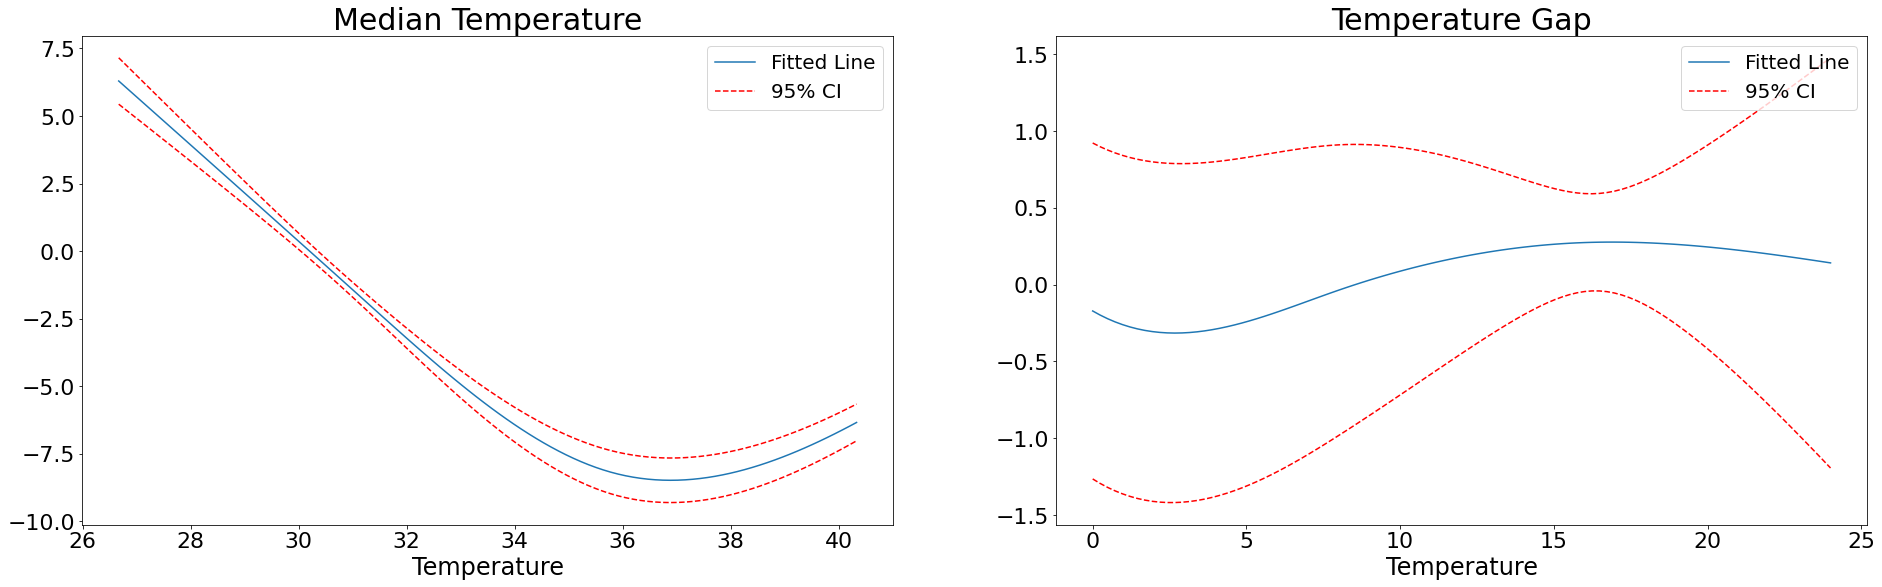

In [13]:
from matplotlib import pyplot as plt

plt.figure();
fig, axs = plt.subplots(1,2);
fig.set_figwidth(32)
fig.set_figheight(9)

titles = ["Median Temperature","Temperature Gap"]
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i], fontsize=30)
    ax.set_xlabel('Temperature', size=24)
    # ax.set_ylabel('Partial Dependency', size=24)
    ax.tick_params(axis="x", labelsize=22)
    ax.tick_params(axis="y", labelsize=22)
    ax.legend(["Fitted Line", "95% CI"], loc="upper right", prop={'size': 20})

fig.align_labels()
# plt.savefig(f'/content/drive/MyDrive/NUS_datathon_team_10_files/Graphs/MIMIC General.png')

In [ ]:
from pygam import LinearGAM, LogisticGAM, s, l, f

X_within = df_merged[["proportion_within_range", "admission_age", "gender", "charlson_score", "apsiii"]]
for row in range(len(X)):
  if X_within["gender"][row]=='F':
     X_within["gender"][row]=0
  else:
     X_within["gender"][row]=1
X_above = df_merged[["proportion_above"]]
X_below = df_merged[["proportion_below"]]
y_train=df_merged["hospital_expire_flag"].to_frame()
gam_within = LogisticGAM(terms=(s(0, n_splines = 6)+ l(1) + f(2) + l(3) + l(4)), fit_intercept=True).fit(X_within, y_train)
gam_above = LogisticGAM(terms=(s(0, n_splines = 4))).fit(X_above, y_train)
gam_below = LogisticGAM(terms=(s(0, n_splines = 4))).fit(X_below, y_train)
# gam.summary()

<ipython-input-10-96c462fd5cdb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_within["gender"][row]=0
<ipython-input-10-96c462fd5cdb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_within["gender"][row]=1


In [ ]:
from pygam import LinearGAM, LogisticGAM, s, l, f

X_within = df_merged[["proportion_within_range", "admission_age", "gender", "charlson_score", "apsiii"]]
for row in range(len(X)):
  if X_within["gender"][row]=='F':
     X_within["gender"][row]=0
  else:
     X_within["gender"][row]=1
y_train=df_merged["hospital_expire_flag"].to_frame()
gam_within = LogisticGAM(terms=(l(0) + l(1) + f(2) + l(3) + l(4))).fit(X_within, y_train)

<ipython-input-11-a11175864022>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_within["gender"][row]=0
<ipython-input-11-a11175864022>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_within["gender"][row]=1


In [ ]:
# print(gam_within.accuracy(X_within, y_train))
# print(gam_within.summary())
print(gam_within.coef_)
print(gam_within.statistics_)
# print(gam_above.accuracy(X, y_train))
# print(gam_below.accuracy(X, y_train))

[-1.57828515  0.01850644  0.06809052 -0.06809066  0.12030372  0.04991781
 -5.65109915]
{'n_samples': 50099, 'm_features': 5, 'edof_per_coef': array([9.99753848e-01, 9.97755787e-01, 9.99608295e-01, 9.98991376e-01,
       9.99944627e-01, 9.99906330e-01, 1.71626551e-28]), 'edof': 5.9959602628706605, 'scale': 1.0, 'cov': array([[ 6.02415502e-03, -3.25173257e-06, -4.28209529e-05,
         4.28208276e-05, -4.97949091e-05,  8.89669622e-06,
        -5.04802427e-03],
       [-3.25173257e-06,  1.79736723e-06, -2.86599869e-06,
         2.86599604e-06, -3.93945500e-06,  1.17859083e-07,
        -1.06530130e-04],
       [-4.28209529e-05, -2.86599869e-06,  3.18854662e-04,
        -3.18854657e-04,  9.11481150e-06,  2.99611439e-07,
         1.82558556e-04],
       [ 4.28208276e-05,  2.86599604e-06, -3.18854657e-04,
         3.18854652e-04, -9.11481081e-06, -2.99612590e-07,
        -1.82558185e-04],
       [-4.97949091e-05, -3.93945500e-06,  9.11481150e-06,
        -9.11481081e-06,  4.65303903e-05, -3.4

In [ ]:
print(gam_within.coef_[-2])

0.04991780923443164


In [ ]:
from sklearn.linear_model import LinearRegression

X_within = df_merged[["proportion_above", "admission_age", "gender", "charlson_score", "apsiii"]]
for row in range(len(X)):
  if X_within["gender"][row]=='F':
     X_within["gender"][row]=0
  else:
     X_within["gender"][row]=1

y_train=df_merged["hospital_expire_flag"].to_frame()

<ipython-input-14-d4d8bb61037a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_within["gender"][row]=0
<ipython-input-14-d4d8bb61037a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_within["gender"][row]=1


In [ ]:
model = LinearRegression().fit(X_within, y_train)

In [ ]:
print(model.intercept_, model.coef_, model.score(X_within, y_train))

[-0.2175119] [[ 0.08041147  0.00053112 -0.00752151  0.00546183  0.00572046]] 0.21816269476432604


In [ ]:
gam = LinearGAM(n_splines=10).gridsearch(X_within, y_train)
gam.summary()

TypeError: ignored

Text(0.5, 0, 'Proportion of time spent in optimal temperature')

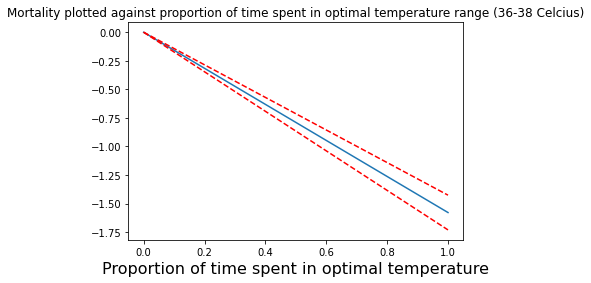

In [ ]:
from matplotlib import pyplot as plt
plt.figure();

XX = gam_within.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam_within.partial_dependence(term=0, X=XX))
plt.plot(XX[:, 0], gam_within.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')
plt.title("Mortality plotted against proportion of time spent in optimal temperature range (36-38 Celcius)")
plt.xlabel('Proportion of time spent in optimal temperature', fontsize=16)

Text(0.5, 1.0, 'yes')

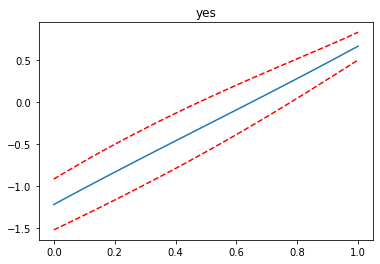

In [ ]:
from matplotlib import pyplot as plt
plt.figure();

XX = gam_above.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam_above.partial_dependence(term=0, X=XX))
plt.plot(XX[:, 0], gam_above.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')
plt.title("yes")

Text(0.5, 1.0, 'yes')

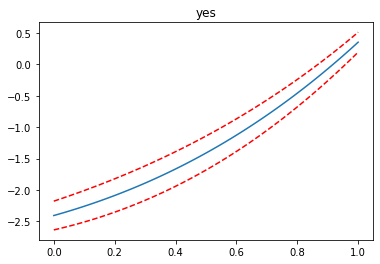

In [ ]:
from matplotlib import pyplot as plt
plt.figure();

XX = gam_below.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam_below.partial_dependence(term=0, X=XX))
plt.plot(XX[:, 0], gam_below.partial_dependence(term=0, X=XX, width=.95)[1], c='r', ls='--')
plt.title("yes")